In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_albis_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Alpha-Bisabolol
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.000000
2,4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3,6,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,9,0.263696,0.018027,-0.040742,-0.177703,0.057154,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42969,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.105263
74996,42971,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.105263
74997,42971,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.105263
74998,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.105263


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..Alpha-Bisabolol', 'index'], axis = 1)
y = df_knn[['X..Alpha-Bisabolol']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.10526316],
       [0.10526316],
       [0.10526316]])

<AxesSubplot:ylabel='Count'>

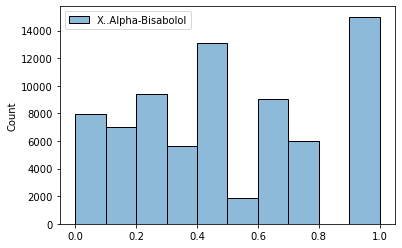

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.04737559109311742

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.01394709793701646

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.11809783205891825

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9194358614049394

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.8660659660859658

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([1.15373863e-01, 9.39625826e-02, 1.05640596e-01, 1.01382686e-01,
       9.80223648e-02, 7.83662314e-03, 8.92549294e-02, 9.70107164e-03,
       4.23839196e-04, 2.89255135e-03, 4.41741421e-03, 4.97711807e-07,
       6.76077406e-03, 8.47043979e-04, 3.54491721e-03, 4.46925237e-03,
       8.55311408e-03, 5.62103566e-03, 4.62227045e-07, 7.15048194e-03,
       6.09999263e-07, 6.74384647e-07, 7.84445168e-03, 5.23803365e-03,
       8.52046466e-03, 2.70389346e-03, 9.27325246e-03, 9.97227213e-04,
       9.56022336e-07, 1.37223454e-03, 8.59326949e-03, 6.85228464e-07,
       6.72298204e-03, 0.00000000e+00, 0.00000000e+00, 5.01441133e-03,
       5.62747326e-03, 8.68253068e-03, 4.72063606e-04, 1.49676901e-04,
       8.73555751e-05, 9.42931974e-03, 4.57224621e-04, 1.24939910e-02,
       5.69853239e-04, 1.20835116e-01, 2.97569355e-03, 1.81842267e-04,
       5.96216404e-03, 1.47416103e-03, 4.25906645e-03, 8.56559353e-03,
       3.71022076e-03, 3.08115162e-04, 4.64744401e-03, 3.94258395e-04,
      

In [19]:
selector.threshold_

0.011627906976744184

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,indica,blueberry,cheese,pungent
0,0.341025,0.182753,0.008214,0.140406,-0.156943,0,0,0,0
1,0.243491,0.034313,0.080290,-0.165609,0.019773,0,0,1,0
2,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,0,0,0,0
3,0.276418,-0.133986,0.116293,0.073694,0.041143,0,0,0,0
4,0.263696,0.018027,-0.040742,-0.177703,0.057154,0,0,1,0
...,...,...,...,...,...,...,...,...,...
74995,0.109738,-0.066611,-0.064934,0.145920,-0.069040,1,0,0,0
74996,0.184573,-0.137296,-0.095301,0.181735,-0.042683,1,0,0,0
74997,0.184573,-0.137296,-0.095301,0.181735,-0.042683,1,0,0,0
74998,0.181714,-0.045560,-0.055692,0.015649,-0.045585,1,0,0,0


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'indica',
 'blueberry',
 'cheese',
 'pungent']

In [54]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_albis.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_albis.pkl")

['selector_knn_lsa_elbow_albis.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.051122447625473945

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.014927963726645163

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.12218004635227948

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9118453693071964

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.8564590955838632

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 7}

kNN (after hyperparameter tuning)

In [55]:
knreg_ht = KNeighborsRegressor(n_neighbors = 7, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [56]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.03268582590768781

In [57]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.10524436070755581

In [58]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9810448611756535

In [59]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8934943184213554

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [60]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [61]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_albis.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_albis.pkl")

['y_test_knreg_lsa_elbow_albis.pkl']

In [62]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.03334051573443934

In [63]:
mean_squared_error(y_test, y_pred_knreg_test)

0.011378071735617461

In [64]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.10666804458514022

In [65]:
r2_score(y_test, y_pred_knreg_test)

0.8922928508853384

In [66]:
y_test

,X..Alpha-Bisabolol
11591,0.368421
52020,0.473684
34666,1.000000
22169,0.421053
23049,0.340351
...,...
60863,1.000000
32316,0.052632
60933,0.217105
43206,0.168421


In [67]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

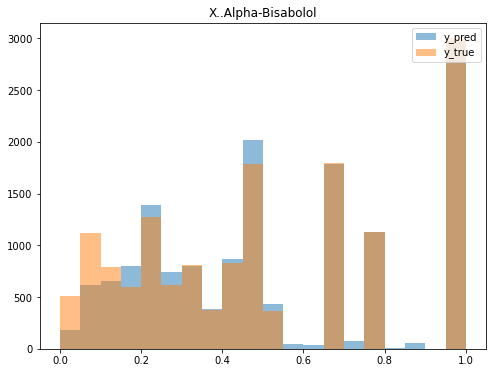

<Figure size 432x288 with 0 Axes>

In [68]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Bisabolol"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_albis.png')

Pearson R

In [69]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.947
P-value: 0.000


<AxesSubplot:>

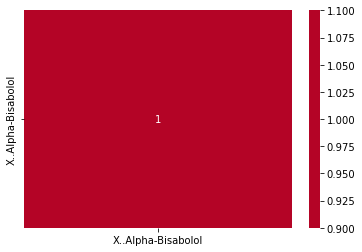

In [70]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)